In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [73]:
df = pd.read_csv('all_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,event_date,country,counts,population,events_per_capita,gdp_per_capita,Western,Asia,South America,public_trust_percentage,living_under_2_dollar_percentage
0,2021,Australia,681,25685412,2.651310,60697.245436,1,0,0,51.9,NaN
1,2022,Australia,794,26005540,3.053196,65099.845912,1,0,0,49.9,NaN
2,2020,Austria,354,8916864,3.970006,48789.497850,1,0,0,62.6,0.6
3,2021,Austria,562,8955797,6.275265,53517.890451,1,0,0,61.0,0.4
4,2022,Austria,294,9041851,3.251547,52084.681195,1,0,0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
113,2021,United Kingdom,1585,67026292,2.364744,46869.759058,1,0,0,39.5,0.2
114,2022,United Kingdom,1745,66971395,2.605590,46125.255751,1,0,0,39.5,NaN
115,2020,United States,21585,331511512,6.511086,63528.634303,1,0,0,46.5,0.2
116,2021,United States,13147,332031554,3.959563,70219.472454,1,0,0,40.5,0.2


In [80]:
df_scaled = pd.DataFrame()
df_scaled['event_date'] = df['event_date']
df_scaled['country'] = df['country']
df_scaled['Western'] = df['Western']
df_scaled['Asia'] = df['Asia']
df_scaled['South America'] = df['South America']

for feat in df.columns[2:]:
        if feat != 'Western' and feat != 'Asia' and feat != 'South America':
                df_scaled[f'{feat}_scaled'] = ((df[feat] - df[feat].mean()) / df[feat].std()).round(3)
df_scaled

,event_date,country,Western,Asia,South America,counts_scaled,population_scaled,events_per_capita_scaled,gdp_per_capita_scaled,public_trust_percentage_scaled,living_under_2_dollar_percentage_scaled
0,2021,Australia,1,0,0,-0.382,-0.283,-0.834,0.720,0.288,NaN
1,2022,Australia,1,0,0,-0.344,-0.278,-0.699,0.877,0.168,NaN
2,2020,Austria,1,0,0,-0.491,-0.524,-0.391,0.295,0.930,0.095
3,2021,Austria,1,0,0,-0.421,-0.523,0.384,0.464,0.834,-0.154
4,2022,Austria,1,0,0,-0.511,-0.522,-0.632,0.412,0.834,NaN
...,...,...,...,...,...,...,...,...,...,...,...
113,2021,United Kingdom,1,0,0,-0.080,0.311,-0.930,0.226,-0.457,-0.403
114,2022,United Kingdom,1,0,0,-0.026,0.310,-0.849,0.200,-0.457,NaN
115,2020,United States,1,0,0,6.604,4.111,0.463,0.821,-0.036,-0.403
116,2021,United States,1,0,0,3.784,4.118,-0.394,1.060,-0.397,-0.403


In [81]:
df_scaled.corr()

/var/folders/z7/152736054bv0sl_wm9ygspfr0000gn/T/ipykernel_12862/309767592.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scaled.corr()


,event_date,Western,Asia,South America,counts_scaled,population_scaled,events_per_capita_scaled,gdp_per_capita_scaled,public_trust_percentage_scaled,living_under_2_dollar_percentage_scaled
event_date,1.000000,0.418741,-0.099151,-0.212938,0.019465,-0.062214,0.145310,0.255186,0.230861,-0.058273
Western,0.418741,1.000000,-0.311234,-0.668411,-0.022514,-0.285831,0.235286,0.475514,0.430178,-0.544830
Asia,-0.099151,-0.311234,1.000000,-0.095027,-0.023615,0.245017,-0.280537,-0.012674,-0.105139,NaN
South America,-0.212938,-0.668411,-0.095027,1.000000,0.162801,0.370382,-0.249832,-0.495538,-0.385211,0.723523
counts_scaled,0.019465,-0.022514,-0.023615,0.162801,1.000000,0.813210,0.131153,-0.040161,-0.187741,0.061129
population_scaled,-0.062214,-0.285831,0.245017,0.370382,0.813210,1.000000,-0.246147,-0.147677,-0.273770,0.303462
events_per_capita_scaled,0.145310,0.235286,-0.280537,-0.249832,0.131153,-0.246147,1.000000,0.193235,0.134652,-0.296407
gdp_per_capita_scaled,0.255186,0.475514,-0.012674,-0.495538,-0.040161,-0.147677,0.193235,1.000000,0.710791,-0.462278
public_trust_percentage_scaled,0.230861,0.430178,-0.105139,-0.385211,-0.187741,-0.273770,0.134652,0.710791,1.000000,-0.370835
living_under_2_dollar_percentage_scaled,-0.058273,-0.544830,NaN,0.723523,0.061129,0.303462,-0.296407,-0.462278,-0.370835,1.000000


In [23]:
plt.scatter3d(x = df['public_trust_percentage'], y = df['living_under_2_dollar_percentage'], z = df['events_per_capita'])
plt.xlabel('Public trust')
plt.ylabel('Living in Poverty')
plt.zlabel('Events per Capita')
plt.title("Fossil Fuels Consumption vs CO2 emissions per population")

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatter3d'

In [66]:
predictors = ['Western', 'South America']
X = df[predictors]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

         Feature  VIF
0        Western  1.0
1  South America  1.0


In [97]:
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        5
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

In [85]:
filtered_df = df_scaled.dropna(subset=['living_under_2_dollar_percentage_scaled'])
filtered_df

,event_date,country,Western,Asia,South America,counts_scaled,population_scaled,events_per_capita_scaled,gdp_per_capita_scaled,public_trust_percentage_scaled,living_under_2_dollar_percentage_scaled
2,2020,Austria,1,0,0,-0.491,-0.524,-0.391,0.295,0.930,0.095
3,2021,Austria,1,0,0,-0.421,-0.523,0.384,0.464,0.834,-0.154
5,2020,Belgium,1,0,0,-0.347,-0.486,0.559,0.181,-1.057,-0.652
6,2021,Belgium,1,0,0,-0.331,-0.485,0.691,0.404,0.012,-0.652
8,2018,Brazil,0,0,1,1.579,2.368,-0.678,-1.122,-1.819,1.836
...,...,...,...,...,...,...,...,...,...,...,...
109,2020,Switzerland,1,0,0,-0.554,-0.528,-1.083,1.620,2.250,-0.652
112,2020,United Kingdom,1,0,0,0.125,0.312,-0.625,-0.012,-0.745,-0.279
113,2021,United Kingdom,1,0,0,-0.080,0.311,-0.930,0.226,-0.457,-0.403
115,2020,United States,1,0,0,6.604,4.111,0.463,0.821,-0.036,-0.403


In [94]:
def linreg_predict(Xnew, ynew, m):
    """takes in the X matrix, y vector, and the m vector which contains the coefficients of the calculated line of best fit and outputs a dictionary that contains the predicted y values, the residuals, the mse, and the r2 score

    Args:
        Xnew (1d or 2d-array): which includes all the desired predictor feature values (not including the bias term)
        y (1d-array):  includes all corresponding output values to Xnew
        m (1d-array): contains the coefficients from the line of best fit function
    Returns:
        preds (dictionary): dictionary containing the predicted y values, the residuals between the y values and the predicted y values, the mse, and the r2 score
    """
    X_bias = add_bias_column(Xnew)
    linreg_stats = {}
    ypreds = np.matmul(X_bias, m)
    linreg_stats['ypreds'] = ypreds
    resids = ynew - ypreds
    linreg_stats['resids'] = resids
    
    #the mse function
    size = len(ynew)
    mse = np.square(resids).mean()
    linreg_stats['mse'] = mse
    linreg_stats['r2'] = r2_score(ynew, ypreds)
    
    return linreg_stats

In [112]:
def gradient_descent(X_b, y, theta, learning_rate, num_iterations):
    X_b = add_bias_column(X_b)
    size = len(y)
    for i in range(num_iterations):
        prediction = X_b.dot(theta) #feature value (value in data) times weight 
        error = prediction - y #difference between predicted and actual
        gradient = (2/size) * X_b.T.dot(error) #gradient = slope (derivative of cost function)
        theta = theta - learning_rate * gradient
        
    return theta

In [83]:
X_array = np.array([df_scaled['public_trust_percentage_scaled'], df_scaled['Western'], df_scaled['Asia'], df_scaled['South America']]).T
y_array = np.array(df_scaled['events_per_capita_scaled'])
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

1.0408717315933247 0.21301832026314993


In [130]:
X_array = np.array([df_scaled['public_trust_percentage_scaled'], df_scaled['Western'], df_scaled['Asia'], df_scaled['South America']]).T
y_array = np.array(df_scaled['events_per_capita_scaled'])
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.3, random_state=42)

theta = np.zeros(5)
newtheta = gradient_descent(X_train, y_train, theta, 0.01, 100000)

# Predict on the test set
y_pred = linreg_predict(X_test, y_test, newtheta)

print(y_pred["mse"], y_pred["r2"])

1.0408717326214467 0.21301831948580807


In [138]:
from sklearn.preprocessing import PolynomialFeatures
# Create a polynomial features transformer
poly_features = PolynomialFeatures(degree=3) 
print(X_train)
# Transform the training data to include quadratic terms
X_train_poly = poly_features.fit_transform(X_train)
print(X_train_poly)

# Transform the test data
X_test_poly = poly_features.transform(X_test)

# Create and fit the linear regression model (on the transformed data)
quadratic_model = LinearRegression()
quadratic_model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_quadratic = quadratic_model.predict(X_test_poly)

# Evaluate the quadratic model
mse_quadratic = mean_squared_error(y_test, y_pred_quadratic)
r2_quadratic = r2_score(y_test, y_pred_quadratic)
print(mse_quadratic, r2_quadratic)

[[ 0.15   0.     0.     0.   ]
 [-1.081  0.     1.     0.   ]
 [-0.781  0.     0.     1.   ]
 [-0.036  1.     0.     0.   ]
 [-0.595  1.     0.     0.   ]
 [-0.703  1.     0.     0.   ]
 [-0.937  0.     0.     0.   ]
 [-0.445  1.     0.     0.   ]
 [ 0.144  0.     0.     1.   ]
 [-1.057  1.     0.     0.   ]
 [ 0.018  1.     0.     0.   ]
 [-0.703  1.     0.     0.   ]
 [-0.367  1.     0.     0.   ]
 [-1.291  1.     0.     0.   ]
 [ 0.222  1.     0.     0.   ]
 [-1.909  0.     0.     1.   ]
 [-0.187  0.     0.     0.   ]
 [ 0.288  1.     0.     0.   ]
 [-0.072  0.     0.     1.   ]
 [ 0.606  1.     0.     0.   ]
 [ 0.804  1.     0.     0.   ]
 [-0.745  1.     0.     0.   ]
 [-1.003  1.     0.     0.   ]
 [-1.039  0.     0.     0.   ]
 [-1.105  0.     0.     1.   ]
 [-1.189  1.     0.     0.   ]
 [-0.535  1.     0.     0.   ]
 [ 0.054  0.     0.     0.   ]
 [-1.819  0.     0.     1.   ]
 [ 0.834  1.     0.     0.   ]
 [-1.057  0.     0.     1.   ]
 [ 0.834  1.     0.     0.   ]
 [-1.801

In [90]:
X_array = np.array([df_scaled['public_trust_percentage_scaled'], df_scaled['Western'], df_scaled['Asia'], df_scaled['South America']]).T
y_array = np.array(df_scaled['events_per_capita_scaled'])
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

1.0408717315933247 0.21301832026314993


In [92]:
df_scaled = pd.DataFrame()
df_scaled['event_date'] = df['event_date']
df_scaled['country'] = df['country']
df_scaled['Western'] = df['Western']
df_scaled['Asia'] = df['Asia']
df_scaled['South America'] = df['South America']
df_scaled['counts'] = df['counts']

for feat in df.columns[2:]:
        if feat != 'Western' and feat != 'Asia' and feat != 'South America' and feat != 'counts':
                df_scaled[f'{feat}_scaled'] = ((df[feat] - df[feat].mean()) / df[feat].std()).round(3)
df_scaled

,event_date,country,Western,Asia,South America,counts,population_scaled,events_per_capita_scaled,gdp_per_capita_scaled,public_trust_percentage_scaled,living_under_2_dollar_percentage_scaled
0,2021,Australia,1,0,0,681,-0.283,-0.834,0.720,0.288,NaN
1,2022,Australia,1,0,0,794,-0.278,-0.699,0.877,0.168,NaN
2,2020,Austria,1,0,0,354,-0.524,-0.391,0.295,0.930,0.095
3,2021,Austria,1,0,0,562,-0.523,0.384,0.464,0.834,-0.154
4,2022,Austria,1,0,0,294,-0.522,-0.632,0.412,0.834,NaN
...,...,...,...,...,...,...,...,...,...,...,...
113,2021,United Kingdom,1,0,0,1585,0.311,-0.930,0.226,-0.457,-0.403
114,2022,United Kingdom,1,0,0,1745,0.310,-0.849,0.200,-0.457,NaN
115,2020,United States,1,0,0,21585,4.111,0.463,0.821,-0.036,-0.403
116,2021,United States,1,0,0,13147,4.118,-0.394,1.060,-0.397,-0.403


In [93]:
X_array = np.array([df_scaled['public_trust_percentage_scaled'], df_scaled['Western'], df_scaled['Asia'], df_scaled['South America']]).T
y_array = np.array(df_scaled['events_per_capita_scaled'])
#X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.3, random_state=42)
model = LinearRegression()
# fit the model on the entire data set to compare the r2 scores and make sure theres no overfitting going on 
model.fit(X_array, y_array)

# Predict on the entire set
y_pred = model.predict(X_array)

# Evaluate the model
mse = mean_squared_error(y_array, y_pred)
r2 = r2_score(y_array, y_pred)
print(mse, r2)

0.8316073644921309 0.16124960875448513


In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_scaled, x='public_trust_percentage_scaled', y='Western', z='events_per_capita', color='country', title='Public Trust vs Events Per Capita vs GDP', height=500, width=1000)
fig.show()

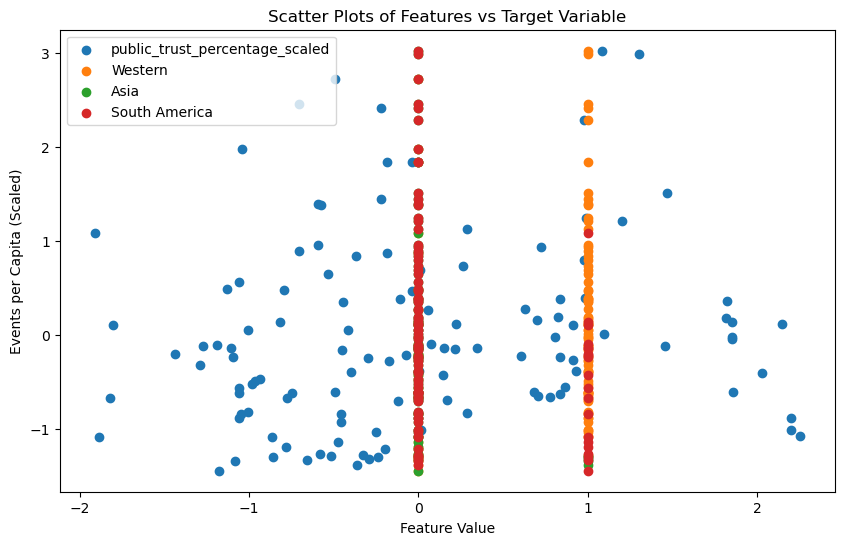

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ... (Your data loading, scaling, and model building code here) ...

# Create a DataFrame for easier plotting
plot_df = pd.DataFrame({
    'public_trust_percentage_scaled': df_scaled['public_trust_percentage_scaled'],
    'Western': df_scaled['Western'],
    'Asia': df_scaled['Asia'],
    'South America': df_scaled['South America'],
    'events_per_capita_scaled': df_scaled['events_per_capita_scaled']
})

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot for each feature against the target variable
for feature in ['public_trust_percentage_scaled', 'Western', 'Asia', 'South America']:
    ax.scatter(plot_df[feature], plot_df['events_per_capita_scaled'], label=feature)

# Set labels and title
ax.set_xlabel("Feature Value")
ax.set_ylabel("Events per Capita (Scaled)")
ax.set_title("Scatter Plots of Features vs Target Variable")

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [163]:
# PRESENT MODEL
# Defining my X and y arrays
X = df_scaled[['public_trust_percentage_scaled', 'gdp_per_capita_scaled', 'Western', 'Asia', 'South America']]
y = df_scaled['events_per_capita_scaled']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adding Interaction Terms because public trust percentage and gdp per capita are highly correlated  
X_train['public_trust_x_gdp_per_capita'] = X_train['public_trust_percentage_scaled'] * X_train['gdp_per_capita_scaled']
X_test['public_trust_x_gdp_per_capita'] = X_test['public_trust_percentage_scaled'] * X_test['gdp_per_capita_scaled']


# --- Polynomial Features ---
poly_features = PolynomialFeatures(degree=3)  # Experiment with different degrees
X_train_poly = poly_features.fit_transform(X_train[['public_trust_percentage_scaled', 'gdp_per_capita_scaled']])  # Apply only to public_trust
X_test_poly = poly_features.transform(X_test[['public_trust_percentage_scaled', 'gdp_per_capita_scaled']])

# Concatenate the transformed features with the original categorical features
X_train_poly = np.concatenate((X_train_poly, X_train[['Western', 'Asia', 'South America', 'public_trust_x_gdp_per_capita']]), axis=1)
X_test_poly = np.concatenate((X_test_poly, X_test[['Western', 'Asia', 'South America', 'public_trust_x_gdp_per_capita']]), axis=1)

# --- Create and Fit Model ---
model = LinearRegression()
model.fit(X_train_poly, y_train)

# --- Predict and Evaluate ---
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

0.903870639668773 0.3166020243604106


In [156]:
# Feature Preparation
X = df_scaled[['public_trust_percentage_scaled', 'gdp_per_capita_scaled', 'Western', 'Asia', 'South America']]
y = df_scaled['events_per_capita_scaled']

# Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# # --- Optionally: Adding Interaction Terms --- 
# # (Only add these if you think the interaction might be important)
X['public_trust_x_gdp_per_capita'] = X['public_trust_percentage_scaled'] * X['gdp_per_capita_scaled']
# Do the same for X_test
#X_test['public_trust_x_gdp_per_capita'] = X_test['public_trust_percentage_scaled'] * X_test['gdp_per_capita_scaled']


# --- #Polynomial Features ---
poly_features = PolynomialFeatures(degree=3)  # Experiment with different degrees
X_poly = poly_features.fit_transform(X[['public_trust_percentage_scaled', 'gdp_per_capita_scaled']])  # Apply only to public_trust
#X_test_poly = poly_features.transform(X_test[['public_trust_percentage_scaled', 'gdp_per_capita_scaled']])

# Concatenate the transformed features with the original categorical features
X_poly = np.concatenate((X_poly, X[['Western', 'Asia', 'South America']]), axis=1)
#X_test_poly = np.concatenate((X_test_poly, X_test[['Western', 'Asia', 'South America']]), axis=1)

# --- Create and Fit Model ---
model = LinearRegression()
model.fit(X_poly, y)

# --- Predict and Evaluate ---
y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(mse, r2)

0.7165094597743941 0.2773361379695043


/var/folders/z7/152736054bv0sl_wm9ygspfr0000gn/T/ipykernel_12862/1899431866.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['public_trust_x_gdp_per_capita'] = X['public_trust_percentage_scaled'] * X['gdp_per_capita_scaled']
